In [1]:
#import dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#reading in weather data from csv
Csvpath = "weather_data2019_csv.csv"
weather_data = pd.read_csv(Csvpath)
weather_data['Date time']= pd.to_datetime(weather_data['Date time']) 
weather_data['Date'] = weather_data['Date time'].dt.strftime('%m/%d/%Y')
weather_data.head()

,Location,Address,Country,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity,Conditions,Date
0,NaN,30308,USA,2019-01-01,64.9,56.1,61.2,NaN,NaN,0.2,NaN,6.0,NaN,70.7,91.08,"Rain, Partially cloudy",01/01/2019
1,NaN,30308,USA,2019-01-02,56.8,48.8,52.1,46.4,NaN,0.4,NaN,7.2,NaN,72.8,92.82,"Rain, Partially cloudy",01/02/2019
2,NaN,30308,USA,2019-01-03,54.4,50.1,52.3,NaN,NaN,0.3,NaN,9.9,NaN,99.4,96.68,"Rain, Overcast",01/03/2019
3,NaN,30308,USA,2019-01-04,64.6,45.0,54.3,40.2,NaN,1.2,NaN,18.1,33.6,87.5,86.99,"Rain, Overcast",01/04/2019
4,NaN,30308,USA,2019-01-05,57.5,43.6,48.6,36.2,NaN,0.0,NaN,17.0,33.3,40.7,65.53,Partially cloudy,01/05/2019


In [3]:
#reading in traffic data from csv Atl_Traffic_data.csv
Csvpath2 = "Atl_Traffic_data.csv"
traffic_data = pd.read_csv(Csvpath2)
traffic_data = traffic_data.rename(columns = {"30312":"30312_Accidents","30339":"30339_Accidents",
                                              "30331":"30331_Accidents","30315":"30315_Accidents",
                                              "30309":"30309_Accidents","30340":"30340_Accidents",
                                              "30308":"30308_Accidents","30324":"30324_Accidents",
                                              "30342":"30342_Accidents","30318":"30318_Accidents"})
traffic_data.head()

,Date,30312_Accidents,30339_Accidents,30331_Accidents,30315_Accidents,30309_Accidents,30340_Accidents,30308_Accidents,30324_Accidents,30342_Accidents,30318_Accidents
0,01/01/2019,2.0,1.0,NaN,1.0,2.0,1.0,NaN,NaN,3.0,NaN
1,01/02/2019,1.0,NaN,2.0,1.0,5.0,2.0,4.0,3.0,1.0,3.0
2,01/03/2019,4.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0
3,01/04/2019,4.0,1.0,1.0,4.0,3.0,6.0,2.0,1.0,1.0,2.0
4,01/05/2019,1.0,NaN,3.0,NaN,NaN,1.0,1.0,1.0,NaN,2.0


In [4]:
#creating separate traffic dataframes for each zipcode
traffic_data_30312 = traffic_data[["Date","30312_Accidents"]]
traffic_data_30339 = traffic_data[["Date","30339_Accidents"]]
traffic_data_30331 = traffic_data[["Date","30331_Accidents"]]
traffic_data_30315 = traffic_data[["Date","30315_Accidents"]]
traffic_data_30309 = traffic_data[["Date","30309_Accidents"]]
traffic_data_30340 = traffic_data[["Date","30340_Accidents"]]
traffic_data_30308 = traffic_data[["Date","30308_Accidents"]]
traffic_data_30324 = traffic_data[["Date","30324_Accidents"]]
traffic_data_30342 = traffic_data[["Date","30342_Accidents"]]
traffic_data_30318 = traffic_data[["Date","30318_Accidents"]]

In [5]:
#creating separate weather dataframes for each zipcode
weather_data_30312 = weather_data.loc[weather_data["Address"]==30312,:]
weather_data_30339 = weather_data.loc[weather_data["Address"]==30339,:]
weather_data_30331 = weather_data.loc[weather_data["Address"]==30331,:]
weather_data_30315 = weather_data.loc[weather_data["Address"]==30315,:]
weather_data_30309 = weather_data.loc[weather_data["Address"]==30309,:]
weather_data_30340 = weather_data.loc[weather_data["Address"]==30340,:]
weather_data_30308 = weather_data.loc[weather_data["Address"]==30308,:]
weather_data_30324 = weather_data.loc[weather_data["Address"]==30324,:]
weather_data_30342 = weather_data.loc[weather_data["Address"]==30342,:]
weather_data_30318 = weather_data.loc[weather_data["Address"]==30318,:]

In [6]:
#30312 traffic and weather merge
weather_traffic_30312 = pd.merge(weather_data_30312, traffic_data_30312, on = "Date", how = "left")
weather_traffic_30312["30312_Accidents"].sum()

764.0

In [7]:
#all other zipcodes traffic and weather merge
#30339
weather_traffic_30339 = pd.merge(weather_data_30339, traffic_data_30339, on = "Date", how = "left")
#30331
weather_traffic_30331 = pd.merge(weather_data_30331, traffic_data_30331, on = "Date", how = "left")
#30315
weather_traffic_30315 = pd.merge(weather_data_30315, traffic_data_30315, on = "Date", how = "left")
#30309
weather_traffic_30309 = pd.merge(weather_data_30309, traffic_data_30309, on = "Date", how = "left")
#30340
weather_traffic_30340 = pd.merge(weather_data_30340, traffic_data_30340, on = "Date", how = "left")
#30308
weather_traffic_30308 = pd.merge(weather_data_30308, traffic_data_30308, on = "Date", how = "left")
#30324
weather_traffic_30324 = pd.merge(weather_data_30324, traffic_data_30324, on = "Date", how = "left")
#30342
weather_traffic_30342 = pd.merge(weather_data_30342, traffic_data_30342, on = "Date", how = "left")
#30318
weather_traffic_30318 = pd.merge(weather_data_30318, traffic_data_30318, on = "Date", how = "left")

In [8]:
# weather_traffic_30312.to_csv('30312_weather_traffic.csv',index = True, header = True)
# weather_traffic_30339.to_csv('30339_weather_traffic.csv',index = True, header = True)
# weather_traffic_30331.to_csv('30331_weather_traffic.csv',index = True, header = True)
# weather_traffic_30315.to_csv('30315_weather_traffic.csv',index = True, header = True)
# weather_traffic_30309.to_csv('30309_weather_traffic.csv',index = True, header = True)
# weather_traffic_30340.to_csv('30340_weather_traffic.csv',index = True, header = True)
# weather_traffic_30308.to_csv('30308_weather_traffic.csv',index = True, header = True)
# weather_traffic_30324.to_csv('30324_weather_traffic.csv',index = True, header = True)
# weather_traffic_30342.to_csv('30342_weather_traffic.csv',index = True, header = True)
# weather_traffic_30318.to_csv('30318_weather_traffic.csv',index = True, header = True)

Text(0.5, 1.0, 'Accident Data')

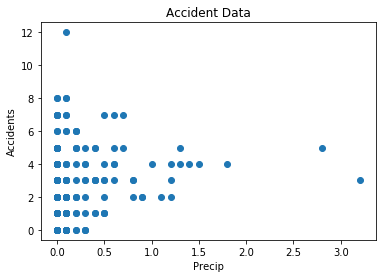

In [9]:
# weather_traffic_30312.head()
weather_traffic_30312["Precipitation"].fillna(0, inplace = True) 
weather_traffic_30312["30312_Accidents"].fillna(0, inplace = True) 

Precip3012 = weather_traffic_30312["Precipitation"]
# Precip3012


Accidents3012 = weather_traffic_30312["30312_Accidents"]
# Accidents3012

plt.scatter(Precip3012, Accidents3012)

plt.xlabel("Precip")
plt.ylabel("Accidents")
plt.title("Accident Data")

The correlation between precip and accidents is 24.0%


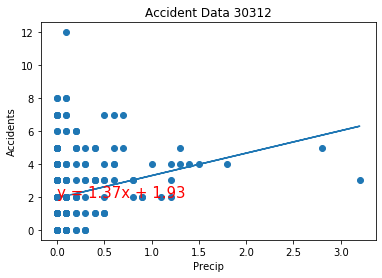

In [81]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(Precip3012, Accidents3012)
regress_values = slope * Precip3012 + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Precip3012, Accidents3012)
plt.plot(Precip3012,regress_values)
plt.annotate(line_eq,(0,2),fontsize=15,color="red")
plt.xlabel("Precip")
plt.ylabel("Accidents")
plt.title("Accident Data 30312")
corr=round(st.pearsonr(Precip3012, Accidents3012)[0],2)*100
print(f"The correlation between precip and accidents is {corr}%")

In [13]:
weather_traffic_30312.head(10)


,Location,Address,Country,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity,Conditions,Date,30312_Accidents
0,NaN,30312,USA,2019-01-01,65.1,56.4,61.5,NaN,NaN,0.2,NaN,6.1,NaN,74.1,90.30,"Rain, Partially cloudy",01/01/2019,2.0
1,NaN,30312,USA,2019-01-02,57.0,49.0,52.4,46.3,NaN,0.4,NaN,7.3,NaN,75.9,91.80,"Rain, Overcast",01/02/2019,1.0
2,NaN,30312,USA,2019-01-03,54.3,50.1,52.5,NaN,NaN,0.3,NaN,10.6,NaN,99.5,95.95,"Rain, Overcast",01/03/2019,4.0
3,NaN,30312,USA,2019-01-04,64.8,45.1,54.5,40.1,NaN,1.2,NaN,18.9,33.6,87.3,86.19,"Rain, Overcast",01/04/2019,4.0
4,NaN,30312,USA,2019-01-05,57.8,43.7,48.8,36.4,NaN,0.0,NaN,17.1,33.3,40.2,64.92,Partially cloudy,01/05/2019,1.0
5,NaN,30312,USA,2019-01-06,68.5,41.6,52.8,38.2,NaN,0.0,NaN,7.6,NaN,8.0,62.19,Clear,01/06/2019,2.0
6,NaN,30312,USA,2019-01-07,67.9,40.8,53.3,45.1,NaN,0.0,NaN,10.3,NaN,26.8,67.52,Partially cloudy,01/07/2019,0.0
7,NaN,30312,USA,2019-01-08,64.5,48.9,56.1,48.1,NaN,0.0,NaN,10.7,NaN,61.0,77.43,Partially cloudy,01/08/2019,5.0
8,NaN,30312,USA,2019-01-09,56.1,39.3,46.7,30.3,NaN,0.0,NaN,20.4,33.5,3.2,41.08,Clear,01/09/2019,4.0
9,NaN,30312,USA,2019-01-10,44.6,29.1,36.2,19.2,NaN,0.0,NaN,16.5,34.4,15.9,50.48,Clear,01/10/2019,4.0


In [16]:
# print(weather_traffic_30312["30312_Accidents"].mean())


print(weather_traffic_30312["30312_Accidents"].sum())
print(weather_traffic_30339["30339_Accidents"].sum())
print(weather_traffic_30331["30331_Accidents"].sum())
print(weather_traffic_30315["30315_Accidents"].sum())
print(weather_traffic_30309["30309_Accidents"].sum())
print(weather_traffic_30340["30340_Accidents"].sum())
print(weather_traffic_30308["30308_Accidents"].sum())
print(weather_traffic_30324["30324_Accidents"].sum())
print(weather_traffic_30342["30342_Accidents"].sum())
print(weather_traffic_30318["30318_Accidents"].sum())

# weather_traffic_30312np = weather_traffic_30312["precipitation"]==0
# print(weather_traffic_30312np)



764.0
584.0
520.0
498.0
492.0
492.0
460.0
438.0
370.0
354.0


The correlation between precip and accidents is 15.0%


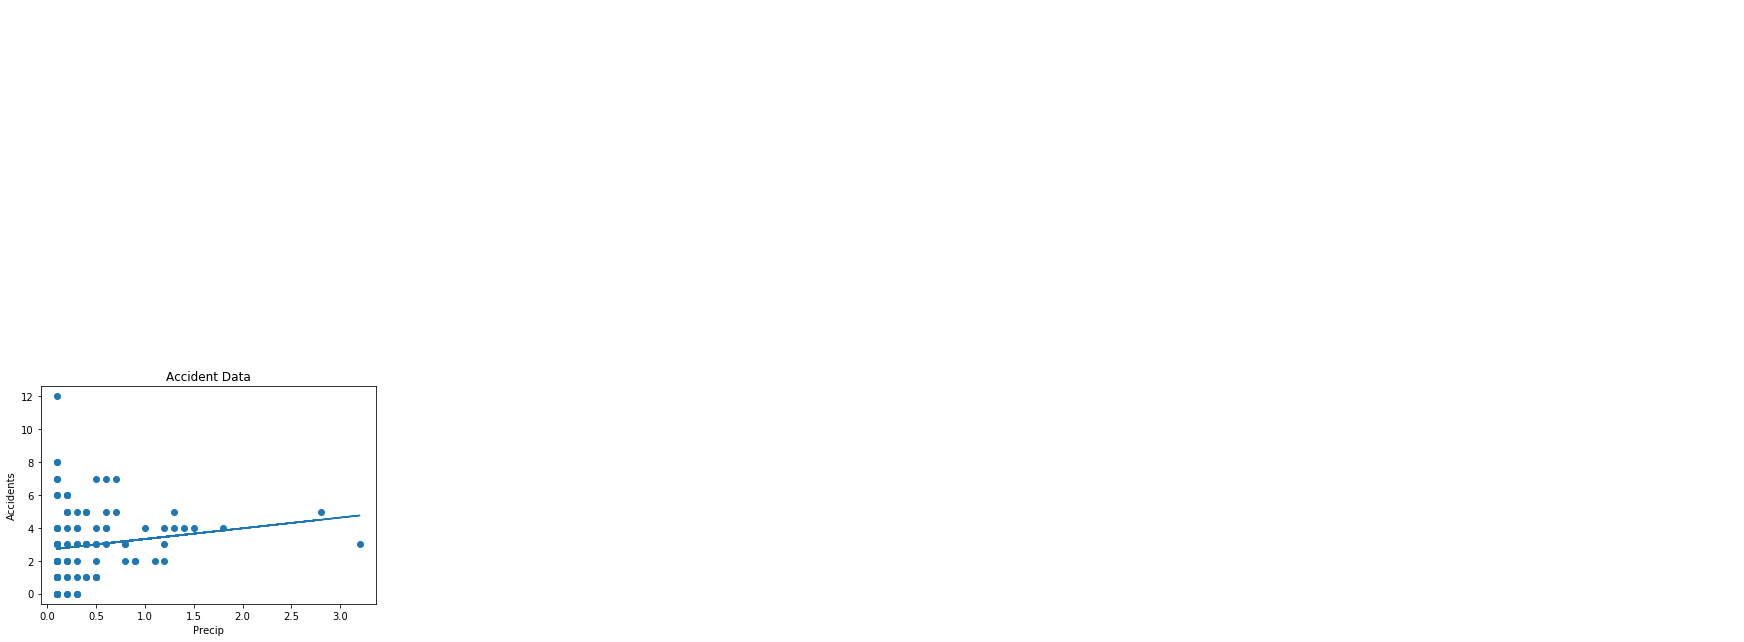

In [47]:
#accidents with precipitation
precip30312 = weather_traffic_30312.loc[weather_traffic_30312['Precipitation'] > 0,['Precipitation','30312_Accidents']]
precip30339 = weather_traffic_30339.loc[weather_traffic_30339['Precipitation'] > 0,['Precipitation','30339_Accidents']]
precip30331 = weather_traffic_30331.loc[weather_traffic_30331['Precipitation'] > 0,['Precipitation','30331_Accidents']]
precip30315 = weather_traffic_30315.loc[weather_traffic_30315['Precipitation'] > 0,['Precipitation','30315_Accidents']]
precip30309 = weather_traffic_30309.loc[weather_traffic_30309['Precipitation'] > 0,['Precipitation','30309_Accidents']]
precip30340 = weather_traffic_30340.loc[weather_traffic_30340['Precipitation'] > 0,['Precipitation','30340_Accidents']]
precip30308 = weather_traffic_30308.loc[weather_traffic_30308['Precipitation'] > 0,['Precipitation','30308_Accidents']]
precip30324 = weather_traffic_30324.loc[weather_traffic_30324['Precipitation'] > 0,['Precipitation','30324_Accidents']]
precip30342 = weather_traffic_30342.loc[weather_traffic_30342['Precipitation'] > 0,['Precipitation','30342_Accidents']]
precip30318 = weather_traffic_30318.loc[weather_traffic_30318['Precipitation'] > 0,['Precipitation','30318_Accidents']]


(slope, intercept, rvalue, pvalue, stderr) = linregress(precip30312['Precipitation'], precip30312['30312_Accidents'])
regress_values = slope * precip30312['Precipitation'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(precip30312['Precipitation'], precip30312['30312_Accidents'])
plt.plot(precip30312['Precipitation'], regress_values)
plt.annotate(line_eq,(16,35),fontsize=15,color="red")
plt.xlabel("Precip")
plt.ylabel("Accidents")
plt.title("Accident Data")
corr=round(st.pearsonr(precip30312['Precipitation'], precip30312['30312_Accidents'])[0],2)*100
print(f"The correlation between precip and accidents is {corr}%")






In [78]:
# Create Averages of data on days with precipitation

precip30312_avgaccident = precip30312['30312_Accidents'].mean()
precip30339_avgaccident = precip30339['30339_Accidents'].mean()
precip30331_avgaccident = precip30331['30331_Accidents'].mean()
precip30315_avgaccident = precip30315['30315_Accidents'].mean()
precip30309_avgaccident = precip30309['30309_Accidents'].mean()
precip30340_avgaccident = precip30340['30340_Accidents'].mean()
precip30308_avgaccident = precip30308['30308_Accidents'].mean()
precip30324_avgaccident = precip30324['30324_Accidents'].mean()
precip30342_avgaccident = precip30342['30342_Accidents'].mean()
precip30318_avgaccident = precip30318['30318_Accidents'].mean()


print('30312 mean accidents with precipitation only '+str(precip30312_avgaccident))
print('30312 mean accidents All data '+str(weather_traffic_30312["30312_Accidents"].mean()))

print('30339 mean accidents with precipitation only '+str(precip30339_avgaccident))
print('30339 mean accidents All data '+str(weather_traffic_30339["30339_Accidents"].mean()))

print('30331 mean accidents with precipitation only '+str(precip30331_avgaccident))
print('30331 mean accidents All data '+str(weather_traffic_30331["30331_Accidents"].mean()))

print('30315 mean accidents with precipitation only '+str(precip30315_avgaccident))
print('30315 mean accidents All data '+str(weather_traffic_30315["30315_Accidents"].mean()))

print('30309 mean accidents with precipitation only '+str(precip30309_avgaccident))
print('30309 mean accidents All data '+str(weather_traffic_30309["30309_Accidents"].mean()))

print('30340 mean accidents with precipitation only '+str(precip30340_avgaccident))
print('30340 mean accidents All data '+str(weather_traffic_30340["30340_Accidents"].mean()))

print('30324 mean accidents with precipitation only '+str(precip30324_avgaccident))
print('30324 mean accidents All data '+str(weather_traffic_30324["30324_Accidents"].mean()))

print('30342 mean accidents with precipitation only '+str(precip30342_avgaccident))
print('30342 mean accidents All data '+str(weather_traffic_30342["30342_Accidents"].mean()))

print('30318 mean accidents with precipitation only '+str(precip30318_avgaccident))
print('30318 mean accidents All data '+str(weather_traffic_30318["30318_Accidents"].mean()))


30312 mean accidents with precipitation only 2.9523809523809526
30312 mean accidents All data 2.0931506849315067
30339 mean accidents with precipitation only 2.6315789473684212
30339 mean accidents All data 2.3934426229508197
30331 mean accidents with precipitation only 2.2
30331 mean accidents All data 2.047244094488189
30315 mean accidents with precipitation only 2.8714285714285714
30315 mean accidents All data 2.3055555555555554
30309 mean accidents with precipitation only 2.27027027027027
30309 mean accidents All data 2.0672268907563027
30340 mean accidents with precipitation only 2.287878787878788
30340 mean accidents All data 2.2363636363636363
30324 mean accidents with precipitation only 1.9855072463768115
30324 mean accidents All data 2.085714285714286
30342 mean accidents with precipitation only 2.169491525423729
30342 mean accidents All data 1.9270833333333333
30318 mean accidents with precipitation only 1.943661971830986
30318 mean accidents All data 1.7611940298507462


In [50]:
# accidents without precipitation
NOprecip30312 = weather_traffic_30312.loc[weather_traffic_30312['Precipitation'] == 0,['Precipitation','30312_Accidents']]
NOprecip30339 = weather_traffic_30339.loc[weather_traffic_30339['Precipitation'] == 0,['Precipitation','30339_Accidents']]
NOprecip30331 = weather_traffic_30331.loc[weather_traffic_30331['Precipitation'] == 0,['Precipitation','30331_Accidents']]
NOprecip30315 = weather_traffic_30315.loc[weather_traffic_30315['Precipitation'] == 0,['Precipitation','30315_Accidents']]
NOprecip30309 = weather_traffic_30309.loc[weather_traffic_30309['Precipitation'] == 0,['Precipitation','30309_Accidents']]
NOprecip30340 = weather_traffic_30340.loc[weather_traffic_30340['Precipitation'] == 0,['Precipitation','30340_Accidents']]
NOprecip30308 = weather_traffic_30308.loc[weather_traffic_30308['Precipitation'] == 0,['Precipitation','30308_Accidents']]
NOprecip30324 = weather_traffic_30324.loc[weather_traffic_30324['Precipitation'] == 0,['Precipitation','30324_Accidents']]
NOprecip30342 = weather_traffic_30342.loc[weather_traffic_30342['Precipitation'] == 0,['Precipitation','30342_Accidents']]
NOprecip30318 = weather_traffic_30318.loc[weather_traffic_30318['Precipitation'] == 0,['Precipitation','30318_Accidents']]




precip30312_avgaccident = precip30312['30312_Accidents'].mean()
print('with precipitation '+str(precip30312_avgaccident))


# noprecip30312_avgaccident = noprecip30312['30312_Accidents'].mean()
# print('without precipitation '+str(noprecip30312_avgaccident))



with precipitation 2.9523809523809526


In [49]:
print(str(address)+'with precipitation '+str(precip30339_avgaccident))
print('without precipitation '+str(noprecip30339_avgaccident))


addresswith precipitation 2.6315789473684212
without precipitation 2.2857142857142856


In [40]:
# #30331
# precip30331 = weather_traffic_30331.loc[weather_traffic_30331['Precipitation'] > 0,['Precipitation','30331_Accidents']]
# precip30331_avgaccident = precip30331['30331_Accidents'].mean()
# print('with precipitation '+str(precip30331_avgaccident))
# noprecip30331 = weather_traffic_30331.loc[weather_traffic_30331['Precipitation'] == 0,['Precipitation','30331_Accidents']]
# noprecip30331_avgaccident = noprecip30331['30331_Accidents'].mean()
# print('without precipitation '+str(noprecip30331_avgaccident))


with precipitation 2.2
without precipitation 1.9770114942528736
